# Spectrum Plotting Tool
####Created by Jacklyn Pezzato in May 2016
####Modified by David Cohen in June 2016 - this version only plots a spectrum

#####Plug in header-removed .dat file after creating a fit in XSPEC. For now, input file is 5-col and two spectra with one row of NO

In [13]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [14]:
# set plot sizes for spectra
plt.rcParams['figure.figsize'] = (35.0, 8.0)
plt.rcParams['font.size'] = 16

###SECTION 0: Read in header-removed data file

In [15]:
# read in ****HEADER-REMOVED**** .dat file from xspec
#datafile = np.recfromtxt('/Users/home/Desktop/plotting/jun2/5T_nonsolar_8jun16a.dat', names=('wvlth','binw','data1','errdata','fit'))
datafile = np.recfromtxt('/Users/home/Dropbox/astro_projects/abundances/plotting/5T_nonsolar_10jun16a.dat', names=('wvlth','binw','data1','errdata','fit'))

In [16]:
# find break in data 1 and data 2
no = []
for i in range(len(datafile.wvlth)):
    if (datafile.wvlth[i]=='NO'):
        no.append(i)

# make variables
L1 = np.array(map(float,datafile.wvlth[0:(no[0])]))
binw1 = np.array(map(float,datafile.binw[0:(no[0])]))
data1 = np.array(map(float,datafile.data1[0:(no[0])]))
err1 = np.array(map(float,datafile.errdata[0:(no[0])]))
model1 = np.array(map(float,datafile.fit[0:(no[0])]))

L2 = np.array(map(float,datafile.wvlth[(no[0]+1):]))
binw2 = np.array(map(float,datafile.binw[(no[0]+1):]))
data2 = np.array(map(float,datafile.data1[(no[0]+1):]))
err2 = np.array(map(float,datafile.errdata[(no[0]+1):]))
model2 = np.array(map(float,datafile.fit[(no[0]+1):]))

# if your file contains only one data set: comment out L2-model2 lines
# if your file contains j data sets: to get the jth Lj-modelj, cut from no[j-1] and end at no[j]+1

In [17]:
# set up arrays for making step-style histograms
# code taken from David Lazere's data_fit.ipynb

# note, unfortunately, that the order in which the bin half width is added and then subtracted from the wavelength 
# has to depend on whether the data are ascending (RGS) or descending (MEG, HEG) -
# here we've hardwired things for RGS (ascending)

L_hist1 = []
binw_hist1 = []
model_hist1 = []
data_hist1 = []
err_hist1 = []
for x in xrange(0, no[0]-1):  
    L_hist1.insert(2*x,L1[x]-binw1[x])
    L_hist1.insert(2*x+1,L1[x]+binw1[x])
    binw_hist1.insert(2*x,binw1[x])
    binw_hist1.insert(2*x+1,binw1[x])
    data_hist1.insert(2*x,data1[x])
    data_hist1.insert(2*x+1,data1[x])
    err_hist1.insert(2*x,err1[x])
    err_hist1.insert(2*x+1,err1[x])
    model_hist1.insert(2*x,model1[x])
    model_hist1.insert(2*x+1,model1[x])
   
L_hist2 = []
binw_hist2 = []
model_hist2 = []
data_hist2 = []
err_hist2 = []
for x in xrange(no[0]+1,):  
    L_hist2.insert(2*x,L2[x]-binw2[x])
    L_hist2.insert(2*x+1,L2[x]+binw2[x])
    binw_hist2.insert(2*x,binw2[x])
    binw_hist2.insert(2*x+1,binw2[x])
    data_hist2.insert(2*x,data2[x])
    data_hist2.insert(2*x+1,data2[x])
    err_hist2.insert(2*x,err2[x])
    err_hist2.insert(2*x+1,err2[x])
    model_hist2.insert(2*x,model2[x])
    model_hist2.insert(2*x+1,model2[x])
   
# do we really need the errs and binws anymore? 

###SECTION 1: Plot the spectra: these blocks define various useful plotting functions

In [24]:
# raw spectrum plotting tool
def plotspecraw(wlarray,dataarray,modelarray,errarray,binwarray, title):
#    plt.plot(wlarray,dataarray,'m^',color='green',markersize=12)
#    plt.errorbar(wlarray,dataarray,yerr=errarray, ecolor='green', capsize=0, fmt="none")
#    plt.plot(wlarray,modelarray,color='green',linewidth=2) 
    plt.errorbar(wlarray,dataarray,ecolor='b',yerr=errarray,fmt='none', label='Data')
    plt.errorbar(wlarray,modelarray,ecolor='k',xerr=binwarray,fmt='none', label='Model')
    plt.xlim([np.min(wlarray)-.2,np.max(wlarray)+.2])
#    plt.xlim(18.9,19.2)
    plt.ylim([np.min([np.min(dataarray),np.min(modelarray)])-.02,np.max([np.max(dataarray),np.max(modelarray)])+.02])
    plt.title(title)
    plt.xlabel('Wavelength (Angstroms)')
    plt.ylabel('Normalized Counts ($s^{-1}A^{-1}$)')
    plt.legend()
    plt.show
    
# function to determine the index of points closest to the desired values
def find_nearest(array,value):
    idx = (np.abs(array-value)).argmin()
    return idx

# raw spectrum plotting function with user selected ranges
def rangeplotspecraw(x_min,x_max,wlarray,dataarray,modelarray,errarray,binwarray, title):
    plt.errorbar(wlarray,dataarray,ecolor='b',yerr=errarray,fmt='none', label='Data')
    plt.errorbar(wlarray,modelarray,ecolor='k',xerr=binwarray,fmt='none', label='Model')
    plt.xlim([x_min-.2, x_max+.2])
    imin = find_nearest(wlarray, x_min)
    imax = find_nearest(wlarray, x_max)
    plt.ylim([np.min([np.min(dataarray[imin:imax]),np.min(modelarray[imin:imax])])-.02,np.max([np.max(dataarray[imin:imax]),np.max(modelarray[imin:imax])])+.02])
    plt.title(title)
    plt.xlabel('Wavelength (Angstroms)')
    plt.ylabel('Normalized Counts ($s^{-1}A^{-1}$)')
    plt.legend()
    plt.show
    
#### the above three functions are Jackie's original ones
#### below are new ones written by David
    
# binned spectrum plotting tool - one array only (infoarray, could be data or model)
def plotspechist(wlarray,infoarray,title):
    plt.plot(wlarray,infoarray,color='green',linewidth=2) 
    plt.xlim(6.0,36.0)
    plt.ylim(0,0.32)
#    plt.ylim(-0.02*np.max(infoarray),1.02*np.max(infoarray))    
    plt.tick_params(axis='both', which='major', labelsize=14)
    plt.xlabel('Wavelength ($\AA$)', fontsize=18)
    plt.ylabel('Count Rate (cts s$^{-1}$ $\AA^{-1}$)', fontsize=18)
    plt.title(title)
    plt.legend()
    plt.show
    
# data plotted as errorbars only (generally for use in conjunciton with model histogram)
def plotdataerrorbar(wlarray,dataarray,errarray):
# this plot command is commented out so we see only the error bars    
#    plt.plot(wlarray,dataarray,'m^',color='green',markersize=12) 
    plt.errorbar(wlarray,dataarray,yerr=errarray, ecolor='green', capsize=0, linewidth=2, fmt="none")
    plt.show
    


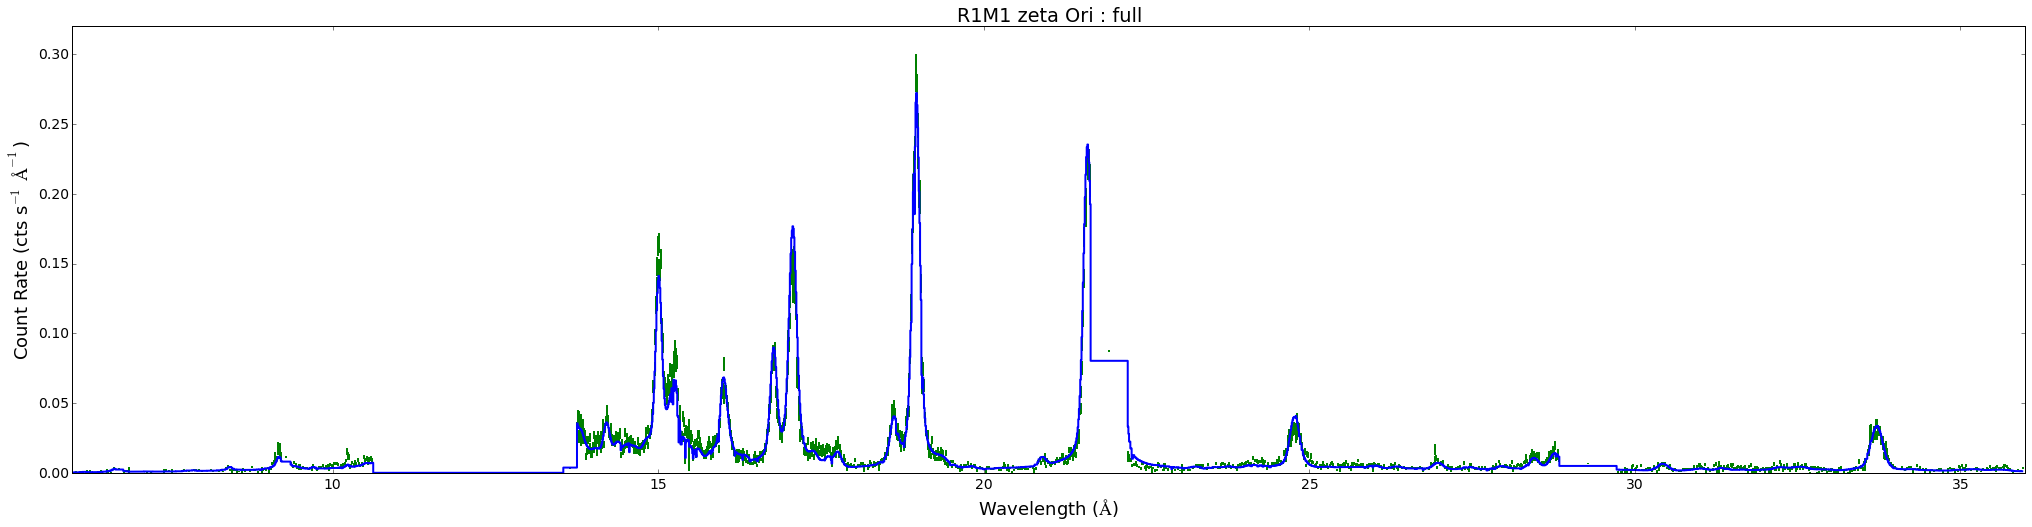

In [19]:
# make a plot of model1
plotspechist(L_hist1, model_hist1, "R1M1 zeta Ori : full")
plotdataerrorbar(L1,data1,err1)
plt.savefig('rgs1.png')

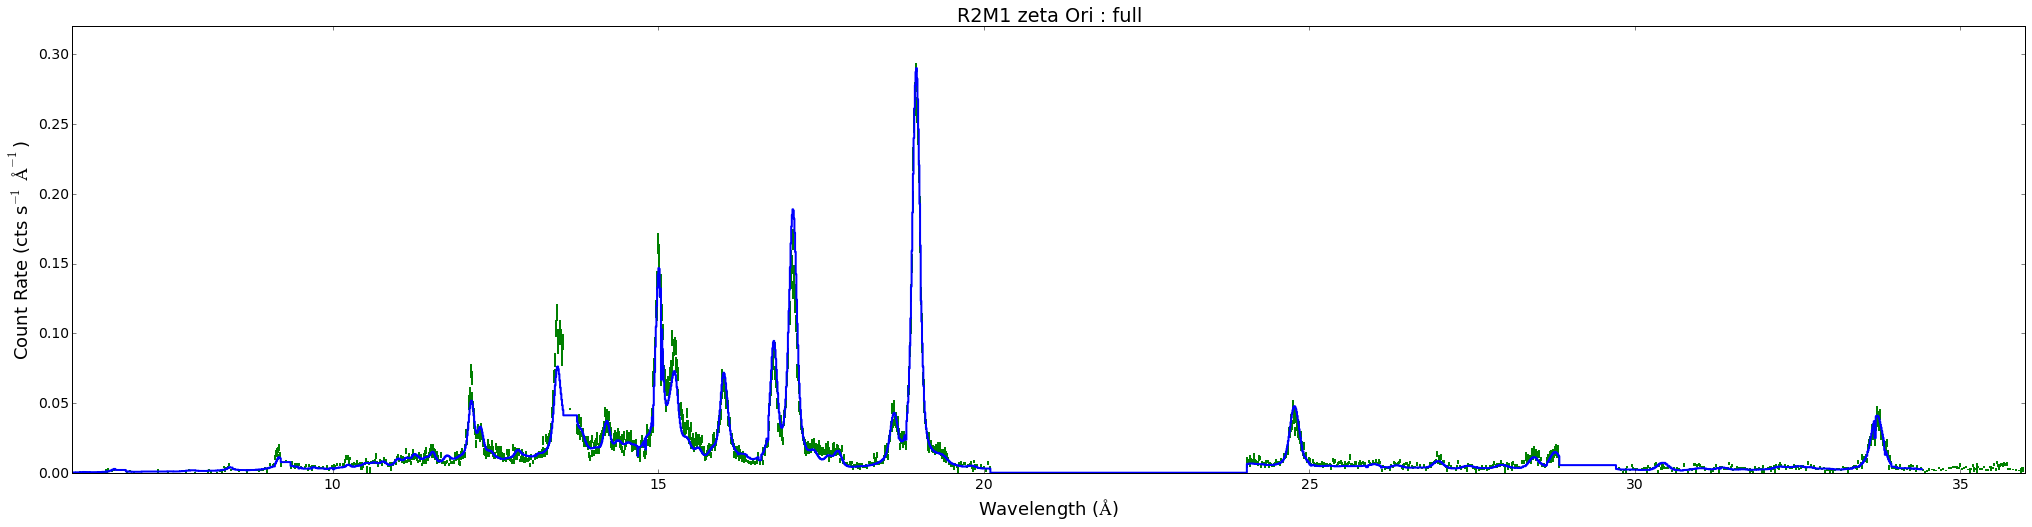

In [20]:
# make a plot of model2
plotspechist(L_hist2, model_hist2, "R2M1 zeta Ori : full")
plotdataerrorbar(L2,data2,err2)
plt.savefig('rgs2.png')

In [21]:
# range plot
# rangeplotspecraw(20,22, L1, data1, model1, err1, binw1,'R1M1 zeta Ori : zoom')

### SECTION 2: Plot just the data

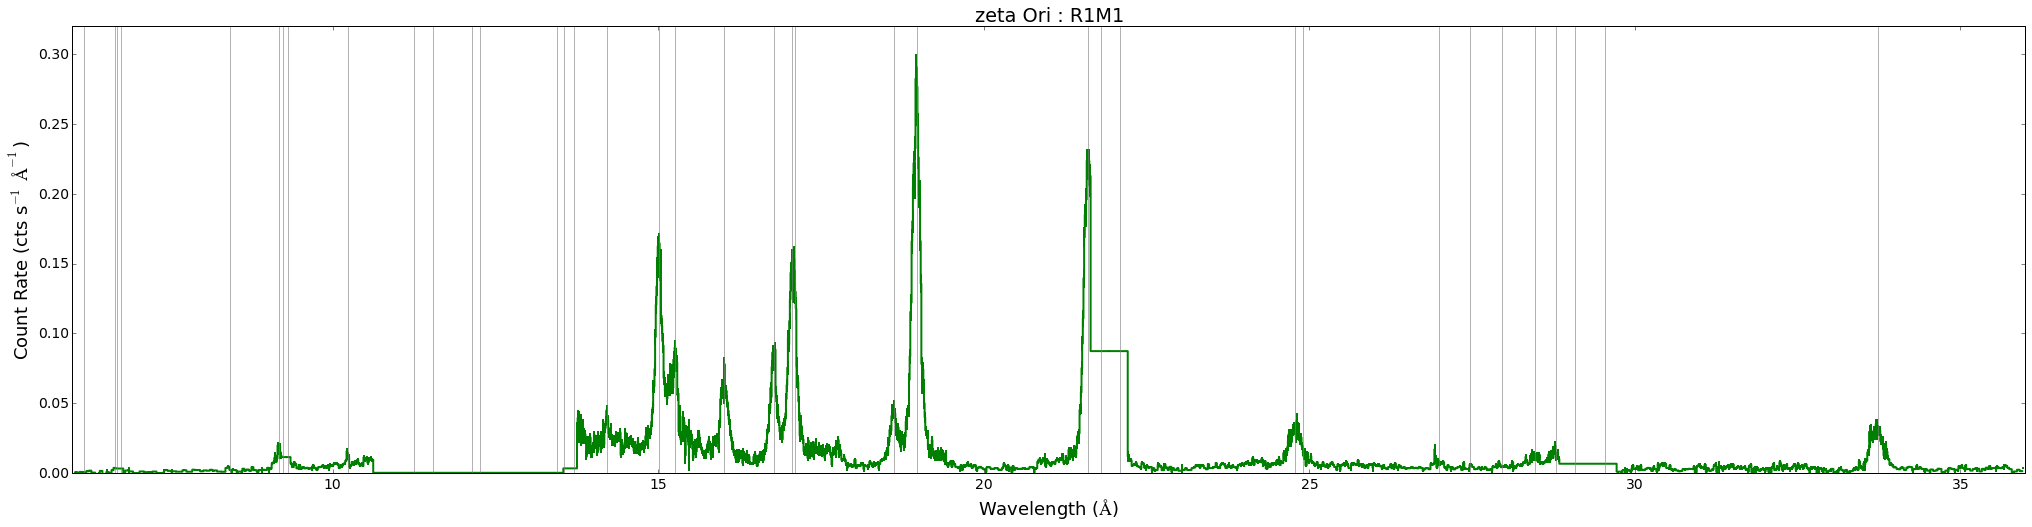

In [25]:
# make a plot of data1 only, no model
plotspechist(L_hist1, data_hist1, "zeta Ori : R1M1")
plotdataerrorbar(L1,data1,err1)

#wavelengths of emission lines put in by hand
plt.plot([6.182,6.182],[0.,1.],color='gray',linewidth=0.6)
plt.plot([6.648,6.648],[0.,1.],color='gray',linewidth=0.6)
plt.plot([6.688,6.688],[0.,1.],color='gray',linewidth=0.6)
plt.plot([6.740,6.740],[0.,1.],color='gray',linewidth=0.6)
plt.plot([8.421,8.421],[0.,1.],color='gray',linewidth=0.6)
plt.plot([9.169,9.169],[0.,1.],color='gray',linewidth=0.6)
plt.plot([9.230,9.230],[0.,1.],color='gray',linewidth=0.6)
plt.plot([9.314,9.314],[0.,1.],color='gray',linewidth=0.6)
plt.plot([10.239,10.239],[0.,1.],color='gray',linewidth=0.6)
plt.plot([11.254,11.254],[0.,1.],color='gray',linewidth=0.6)
plt.plot([11.544,11.544],[0.,1.],color='gray',linewidth=0.6)
plt.plot([12.134,12.134],[0.,1.],color='gray',linewidth=0.6)
plt.plot([12.266,12.266],[0.,1.],color='gray',linewidth=0.6)
plt.plot([13.447,13.447],[0.,1.],color='gray',linewidth=0.6)
plt.plot([13.552,13.552],[0.,1.],color='gray',linewidth=0.6)
plt.plot([13.699,13.699],[0.,1.],color='gray',linewidth=0.6)
plt.plot([14.208,14.208],[0.,1.],color='gray',linewidth=0.6)
plt.plot([15.014,15.014],[0.,1.],color='gray',linewidth=0.6)
plt.plot([15.261,15.261],[0.,1.],color='gray',linewidth=0.6)
plt.plot([16.006,16.006],[0.,1.],color='gray',linewidth=0.6)
plt.plot([16.780,16.780],[0.,1.],color='gray',linewidth=0.6)
plt.plot([17.051,17.051],[0.,1.],color='gray',linewidth=0.6)
plt.plot([17.096,17.096],[0.,1.],color='gray',linewidth=0.6)
plt.plot([18.627,18.627],[0.,1.],color='gray',linewidth=0.6)
plt.plot([18.969,18.969],[0.,1.],color='gray',linewidth=0.6)
plt.plot([21.602,21.602],[0.,1.],color='gray',linewidth=0.6)
plt.plot([21.804,21.804],[0.,1.],color='gray',linewidth=0.6)
plt.plot([22.098,22.098],[0.,1.],color='gray',linewidth=0.6)
plt.plot([24.781,24.781],[0.,1.],color='gray',linewidth=0.6)
plt.plot([24.898,24.898],[0.,1.],color='gray',linewidth=0.6)
plt.plot([26.990,26.990],[0.,1.],color='gray',linewidth=0.6)
plt.plot([27.464,27.464],[0.,1.],color='gray',linewidth=0.6)
plt.plot([27.953,27.953],[0.,1.],color='gray',linewidth=0.6)
plt.plot([28.465,28.465],[0.,1.],color='gray',linewidth=0.6)
plt.plot([28.787,28.787],[0.,1.],color='gray',linewidth=0.6)
plt.plot([29.084,29.084],[0.,1.],color='gray',linewidth=0.6)
plt.plot([29.535,29.535],[0.,1.],color='gray',linewidth=0.6)
plt.plot([33.736,33.736],[0.,1.],color='gray',linewidth=0.6)

plt.savefig('rgs1_data.png')

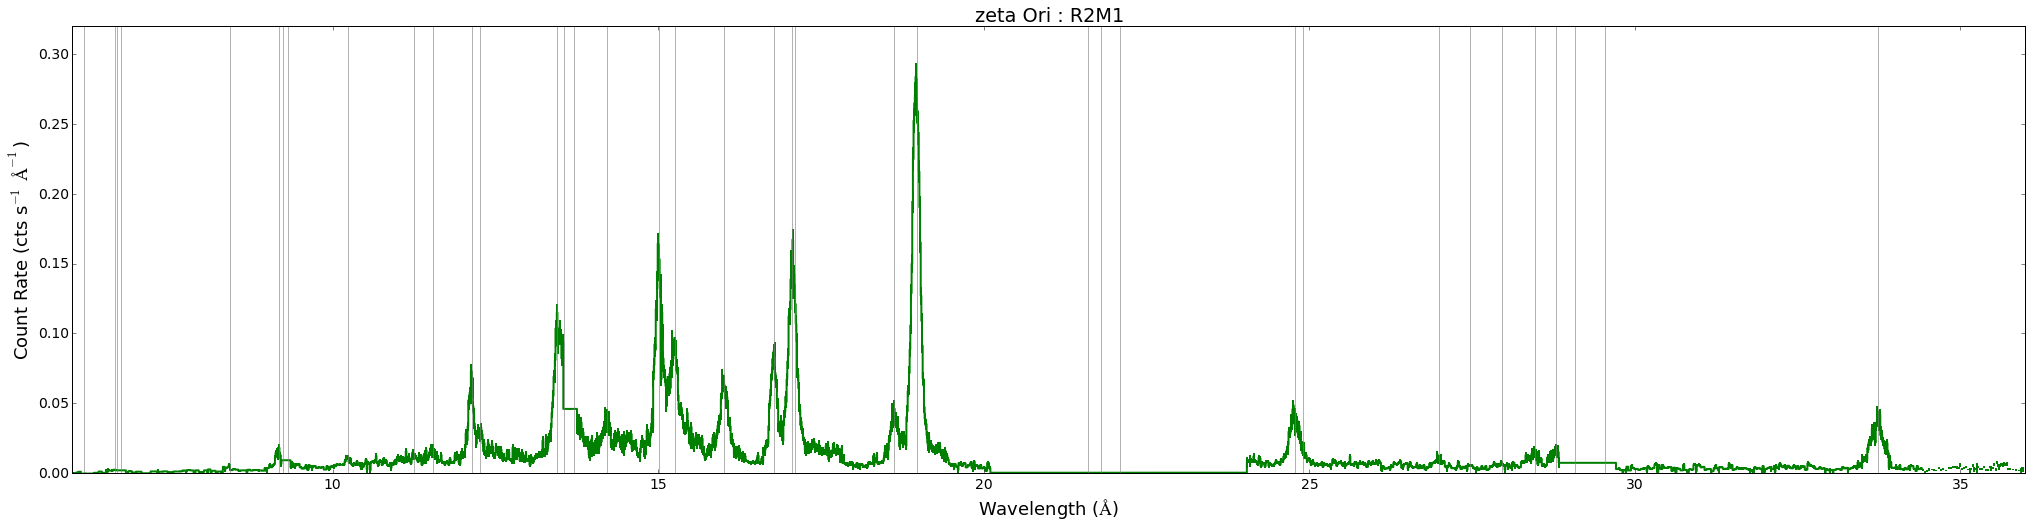

In [26]:
# make a plot of data2 only, no model
plotspechist(L_hist2, data_hist2, "zeta Ori : R2M1")
plotdataerrorbar(L2,data2,err2)

#wavelengths of emission lines put in by hand
plt.plot([6.182,6.182],[0.,1.],color='gray',linewidth=0.6)
plt.plot([6.648,6.648],[0.,1.],color='gray',linewidth=0.6)
plt.plot([6.688,6.688],[0.,1.],color='gray',linewidth=0.6)
plt.plot([6.740,6.740],[0.,1.],color='gray',linewidth=0.6)
plt.plot([8.421,8.421],[0.,1.],color='gray',linewidth=0.6)
plt.plot([9.169,9.169],[0.,1.],color='gray',linewidth=0.6)
plt.plot([9.230,9.230],[0.,1.],color='gray',linewidth=0.6)
plt.plot([9.314,9.314],[0.,1.],color='gray',linewidth=0.6)
plt.plot([10.239,10.239],[0.,1.],color='gray',linewidth=0.6)
plt.plot([11.254,11.254],[0.,1.],color='gray',linewidth=0.6)
plt.plot([11.544,11.544],[0.,1.],color='gray',linewidth=0.6)
plt.plot([12.134,12.134],[0.,1.],color='gray',linewidth=0.6)
plt.plot([12.266,12.266],[0.,1.],color='gray',linewidth=0.6)
plt.plot([13.447,13.447],[0.,1.],color='gray',linewidth=0.6)
plt.plot([13.552,13.552],[0.,1.],color='gray',linewidth=0.6)
plt.plot([13.699,13.699],[0.,1.],color='gray',linewidth=0.6)
plt.plot([14.208,14.208],[0.,1.],color='gray',linewidth=0.6)
plt.plot([15.014,15.014],[0.,1.],color='gray',linewidth=0.6)
plt.plot([15.261,15.261],[0.,1.],color='gray',linewidth=0.6)
plt.plot([16.006,16.006],[0.,1.],color='gray',linewidth=0.6)
plt.plot([16.780,16.780],[0.,1.],color='gray',linewidth=0.6)
plt.plot([17.051,17.051],[0.,1.],color='gray',linewidth=0.6)
plt.plot([17.096,17.096],[0.,1.],color='gray',linewidth=0.6)
plt.plot([18.627,18.627],[0.,1.],color='gray',linewidth=0.6)
plt.plot([18.969,18.969],[0.,1.],color='gray',linewidth=0.6)
plt.plot([21.602,21.602],[0.,1.],color='gray',linewidth=0.6)
plt.plot([21.804,21.804],[0.,1.],color='gray',linewidth=0.6)
plt.plot([22.098,22.098],[0.,1.],color='gray',linewidth=0.6)
plt.plot([24.781,24.781],[0.,1.],color='gray',linewidth=0.6)
plt.plot([24.898,24.898],[0.,1.],color='gray',linewidth=0.6)
plt.plot([26.990,26.990],[0.,1.],color='gray',linewidth=0.6)
plt.plot([27.464,27.464],[0.,1.],color='gray',linewidth=0.6)
plt.plot([27.953,27.953],[0.,1.],color='gray',linewidth=0.6)
plt.plot([28.465,28.465],[0.,1.],color='gray',linewidth=0.6)
plt.plot([28.787,28.787],[0.,1.],color='gray',linewidth=0.6)
plt.plot([29.084,29.084],[0.,1.],color='gray',linewidth=0.6)
plt.plot([29.535,29.535],[0.,1.],color='gray',linewidth=0.6)
plt.plot([33.736,33.736],[0.,1.],color='gray',linewidth=0.6)

plt.savefig('rgs2_data.png')